In [7]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [8]:
class batsman(TypedDict):

    runs: int
    balls: int
    fours: int
    sixes: int  

    sr:float
    bpb:float
    boundry_percent:float
    summary:str

In [17]:
def strike_rate(state:batsman)->batsman:
    prompt=f"calculate strike rate of a batsman who scored {state['runs']} runs in {state['balls']} balls"

    sr=state['runs']/state['balls']*100
    state['sr']=sr

    return {'sr':sr}

In [18]:
def boundry_percentage(state:batsman)->batsman:
    prompt=f"Calculate the boundry percentage of a batsman who scored {state['runs']} and hit {state['fours']} fours and {state['sixes']} sixes"

    boundry_percentage=(state['fours']*4 + state['sixes']*6)/state['runs']*100
    state['boundry_percent']=boundry_percentage

    return {'boundry_percent':boundry_percentage}

In [19]:
def balls_per_boundry(state:batsman)->batsman:
    prompt=f"Calculate the balls per boundry of a batsman who faced {state['balls']} balls and hit {state['fours']} fours and {state['sixes']} sixes"

    total_boundries=state['fours']+state['sixes']
    bpb=state['balls']/total_boundries
    state['bpb']=bpb

    return {'bpb':bpb}

In [20]:
def Summarize(state:batsman)->str:
   

    summary=f"The batsman scored {state['runs']} runs in {state['balls']} balls with a strike rate of {state['sr']:.2f}, boundry percentage of {state['boundry_percent']:.2f} and balls per boundry of {state['bpb']:.2f}"

    state['summary']=summary

    return {'summary':summary}

In [21]:
graph=StateGraph(batsman)

graph.add_node("strike_rate",strike_rate)
graph.add_node("boundry_percentage",boundry_percentage)
graph.add_node("balls_per_boundry",balls_per_boundry)
graph.add_node("Summarize",Summarize)

graph.add_edge(START,"strike_rate")
graph.add_edge("strike_rate","Summarize")
graph.add_edge(START,"boundry_percentage")
graph.add_edge("boundry_percentage","Summarize")
graph.add_edge(START,"balls_per_boundry")
graph.add_edge("balls_per_boundry","Summarize")
graph.add_edge("Summarize",END)


In [22]:
workflow=graph.compile()

In [24]:
initial_state={'runs':150,
               'balls':113,
               'fours':11,
               'sixes':8}

result=workflow.invoke(initial_state)

print(result['summary'])

The batsman scored 150 runs in 113 balls with a strike rate of 132.74, boundry percentage of 61.33 and balls per boundry of 5.95


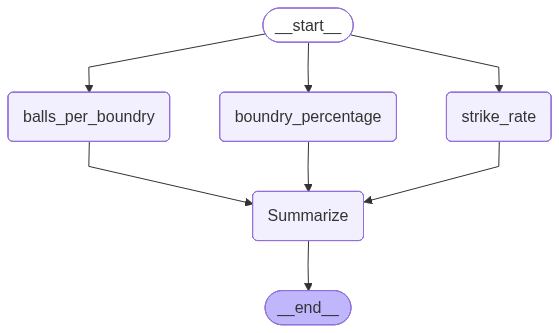

In [13]:
from IPython.display import Image, display

try:
    display(Image(workflow.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass